In [109]:
### BAU / Tez Çalışması 2023 - Hakan Damar ###
# Import required packages
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt
from shapely import wkt

# Update Warning Settings
import warnings
warnings.filterwarnings('ignore')

In [110]:
# Load raw data for Turkey
col_names = ['region', 'year', 'dyad_name', 'deaths_civilians', 'deaths_unknown', 'deaths_a', 'deaths_b', 'best_est', 'adm_1', 'geom_wkt']
raw_dataset = pd.read_csv('tr_data.csv', skipinitialspace=True, usecols=col_names, index_col=False)

# Prepare data for GeoDataFrame
dataset = raw_dataset.copy()
dataset['year'] = dataset['year'].astype("string")
dataset['adm_1'] = dataset['adm_1'].str.split(' ').str[0]
dataset['Coordinates'] = geopandas.GeoSeries.from_wkt(dataset['geom_wkt'])

# Replace column name for map
dataset.rename(columns= {'year':'Yıl', 'adm_1':'Konum', 'dyad_name':'Çatışan Taraflar', 'best_est':'Ölü Sayısı'}, inplace=True)

gdf = geopandas.GeoDataFrame(dataset, geometry='Coordinates', crs=4326)
gdf.head()

Yıl                         Çatışan Taraflar      Konum  \
0  2012  Government of Syria - Syrian insurgents  Şanlıurfa   
1  2013               Government of Turkey - PKK    Hakkari   
2  2013               Government of Turkey - PKK     Mardin   
3  2013               Government of Turkey - PKK     Mardin   
4  2013               Government of Turkey - PKK     Mardin   

                      geom_wkt       region  deaths_a  deaths_b  \
0     POINT (38.9475 36.71111)  Middle East         0         0   
1  POINT (43.616667 37.250556)  Middle East         1        14   
2  POINT (41.215694 37.075333)  Middle East         0         1   
3  POINT (40.737778 37.316667)  Middle East         1         0   
4        POINT (41.448 37.372)  Middle East         0         2   

   deaths_civilians  deaths_unknown  Ölü Sayısı                Coordinates  
0                 5               0           5  POINT (38.94750 36.71111)  
1                 0               0          15  POINT (43.61667 37.25056)  
2                 0               0           1  POINT (41.21569 37.07533)  
3                 0               0           1  POINT (40.73778 37.31667)  
4                 0               0           2  POINT (41.44800 37.37200)

<AxesSubplot:xlabel='Yıl'>

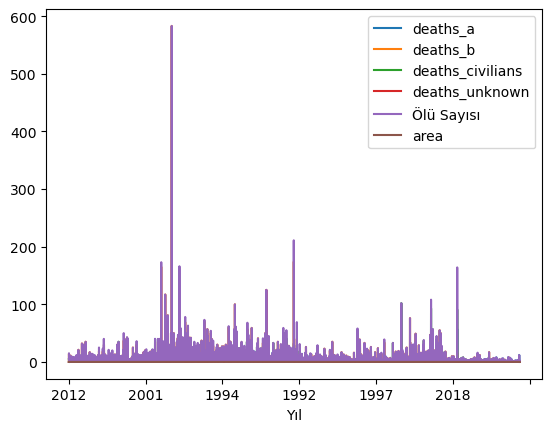

In [111]:
# Plot GDF
gdf = gdf.set_index("Yıl")
gdf["area"] = gdf.area
gdf['boundary'] = gdf.boundary
gdf['centroid'] = gdf.centroid

fig, ax = plt.subplots(1, 1)
gdf.plot(kind="line", column='Ölü Sayısı', ax=ax, legend=True)

In [112]:
risk_map = gdf.explore("area", legend=False, popup=['Çatışan Taraflar', 'Yıl', 'Konum', 'Ölü Sayısı'], tooltip=False, cmap='flag')

riskMapHTML = r'TR_Risk_Map_2023.html'
risk_map.save(riskMapHTML)

risk_map